## Library Imports

In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

plt.style.use("seaborn-v0_8-muted")

## Dataset Import and Initial Values

In [2]:
df = pd.read_csv('./age_distribution_per_barangay_2023.csv', index_col='BARANGAY')
sdf = pd.read_csv('./municipal_summary_per_barangay_2023.csv', encoding='latin-1', index_col='BARANGAY')
new_columns = ['number_of_precincts', 'registered_males', 'registered_females', 'registered_invalid_sex', 'total_voters', 'total_male_voters', 'total_female_voters', 'total_invalid_sex_voters', 'total_number_who_voted', 'total_male_voters_perc', 'total_female_voters_perc', 'total_number_who_voted_perc']
sdf.columns = new_columns

In [3]:
sdf['registered_males'] = sdf['registered_males'].str.replace(',', '').astype(int)
sdf['registered_females'] = sdf['registered_females'].str.replace(',', '').astype(int)
sdf['total_voters'] = sdf['total_voters'].str.replace(',', '').astype(int)
sdf['total_male_voters'] = sdf['total_male_voters'].str.replace(',', '').astype(int)
sdf['total_female_voters'] = sdf['total_female_voters'].str.replace(',', '').astype(int)
sdf['total_number_who_voted'] = sdf['total_number_who_voted'].str.replace(',', '').astype(int)

In [4]:
gen_images_add = './Generated Images'
list_of_barangays = []
for pdf in os.listdir('./PDFS'):
    list_of_barangays.append(pdf[:-4])
list_of_barangays[4] = list_of_barangays[4][:-15]
groups = ['18-30', '31-59', '60+']

## Registered Voters Distribution per Barangay per Age Distribution

In [5]:
def print_age_distribution_per_barangay(age_group):
    cur_group = df.sort_values(by=age_group, ascending=True)
    cur_group[age_group].plot(kind='barh', figsize=(10, 6))
    ax = cur_group[age_group].plot(kind='barh', figsize=(10, 6))
    
    for i, v in enumerate(cur_group[age_group]):
        ax.text(v + 0.1, i, str(v), color='black')
    
    sns.set_style("white") 
    sns.despine()
    plt.xlabel('VOTER COUNT')
    plt.title(f'REGISTERED VOTERS DISTRIBUTION PER BARANGAY AGED {age_group}')
    
    plt.show()

interact(print_age_distribution_per_barangay, age_group=groups)

interactive(children=(Dropdown(description='age_group', options=('18-30', '31-59', '60+'), value='18-30'), Out…

<function __main__.print_age_distribution_per_barangay(age_group)>

## Age Distribution per Barangay

In [6]:
def print_pie_chart(barangay):
    values = {
        '18-30': df.loc[barangay, '18-30'],
        '31-59': df.loc[barangay, '31-59'],
        '60+': df.loc[barangay, '60+'],
    }
    sorted_values = dict(sorted(values.items(), key=lambda item:-item[1]))
    labels = list(sorted_values.keys())
    sizes = list(sorted_values.values())
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    
    plt.axis('equal')
    
    plt.title(f'AGE DISTRIBUTION FOR {barangay}')
    plt.show()

interact(print_pie_chart, barangay=list_of_barangays)

interactive(children=(Dropdown(description='barangay', options=('BRGY ACACIA', 'BRGY BARITAN', 'BRGY BAYAN BAY…

<function __main__.print_pie_chart(barangay)>

In [22]:
import csv
lst = []

def return_age_value(barangay, age_bracket):
    values = {
        '18-30': df.loc[barangay, '18-30'],
        '31-59': df.loc[barangay, '31-59'],
        '60+': df.loc[barangay, '60+'],
    }
    return values[age_bracket]

for i in list_of_barangays:
    print(i)
    qlst = []
    for j in groups: 
        qlst.append(return_age_value(i, j))
    lst.append(qlst)

file_path = "./test.csv"

# Writing data to CSV file
with open(file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(lst)

print("Data has been successfully saved to", file_path)

BRGY ACACIA
BRGY BARITAN
BRGY BAYAN BAYANAN
BRGY CATMON
BRGY CONCEPCION
BRGY DAMPALIT
BRGY FLORES
BRGY HULONG DUHAT
BRGY IBABA
BRGY LONGOS
BRGY MAYSILO
BRGY MUZON
BRGY NIUGAN
BRGY PANGHULO
BRGY POTRERO
BRGY SAN AGUSTIN
BRGY SANTOLAN
BRGY TANONG
BRGY TINAJEROS
BRGY TONSUYA
BRGY TUGATOG
Data has been successfully saved to ./test.csv


## Total Age Distribution

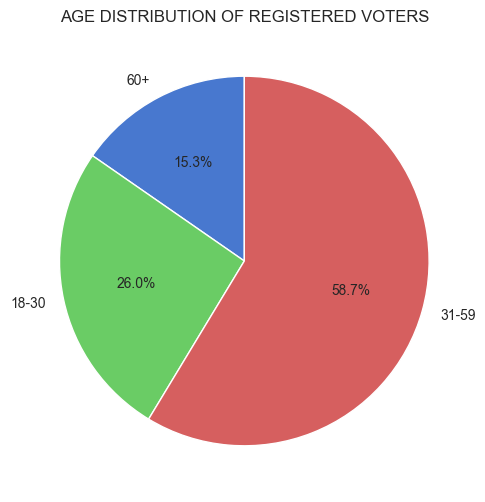

In [7]:
column_sums = df.sum(axis=0)
age_groups = column_sums.sort_values()
age_groups.plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%', startangle=90)

plt.title(f'AGE DISTRIBUTION OF REGISTERED VOTERS')
plt.show()

## Registered Voters per Barangay

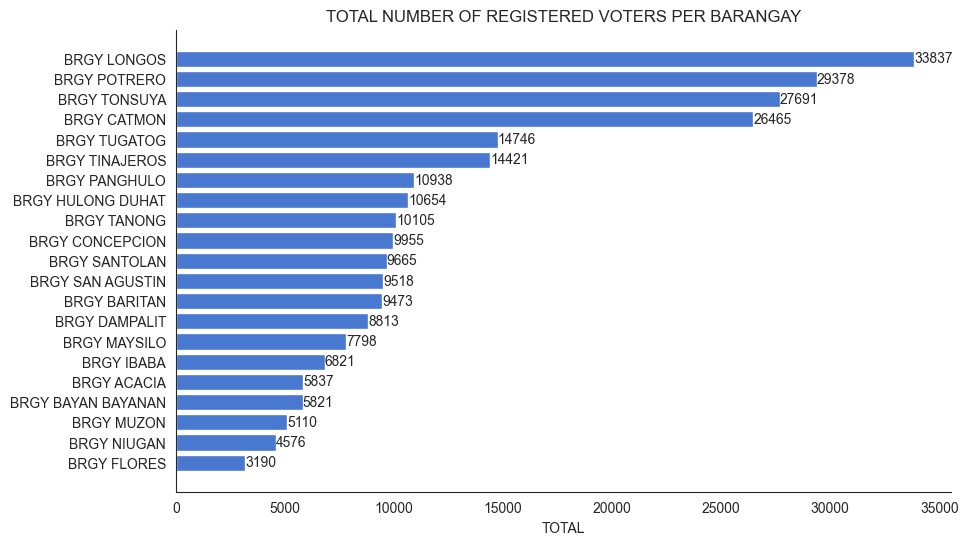

In [8]:
df['Total'] = df['18-30']+df['31-59']+df['60+']

sorted_df = df.sort_values(by='Total')

plt.figure(figsize=(10,6))
ax = plt.barh(sorted_df.index, sorted_df['Total'])
for bar, value in zip(ax, sorted_df['Total']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(value), ha='left', va='center')


sns.set_style("white") 
sns.despine()

plt.xlabel('TOTAL')
plt.title('TOTAL NUMBER OF REGISTERED VOTERS PER BARANGAY')

plt.show()

## Registered Voters Distribution by Sex

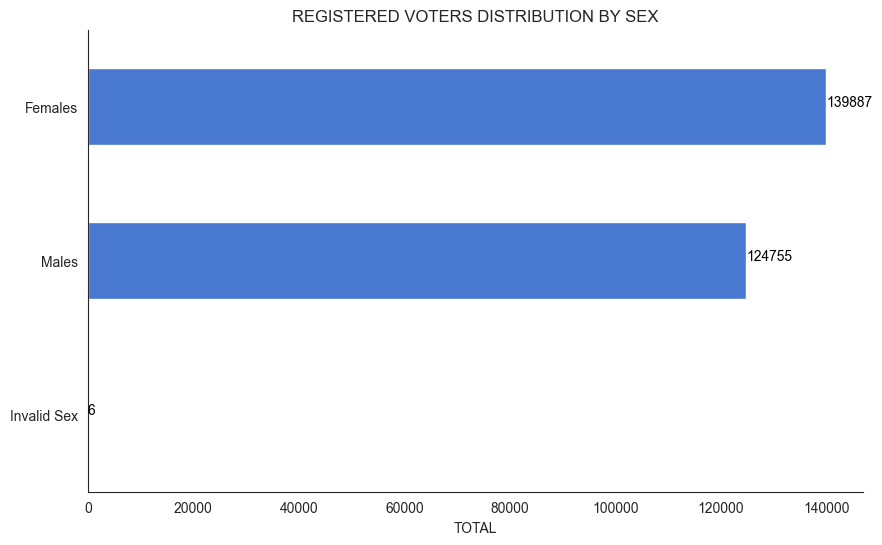

In [9]:
column_sums = sdf.sum(axis=0)
sdct = {
    'Males': column_sums['registered_males'],
    'Females': column_sums['registered_females'],
    'Invalid Sex': column_sums['registered_invalid_sex'],
}
ser = pd.Series(sdct).sort_values()
ax = ser.plot(kind='barh', figsize=(10, 6))
for i, v in enumerate(ser):
    ax.text(v + 0.1, i, str(v), color='black')
    
sns.set_style("white") 
sns.despine()

plt.xlabel('TOTAL')
plt.title('REGISTERED VOTERS DISTRIBUTION BY SEX')
plt.show()

## Sex Distribution per Barangay

In [10]:
def print_sex_distribution_chart_per_barangay(barangay):
    column_sums = sdf.sum(axis=0)
    sdct = {
        'Males': sdf.loc[barangay, 'registered_males'],
        'Females': sdf.loc[barangay, 'registered_females'],
        'Invalid Sex': sdf.loc[barangay, 'registered_invalid_sex'],
    }
    ser = pd.Series(sdct).sort_values()
    ax = ser.plot(kind='barh', figsize=(10, 6))
    for i, v in enumerate(ser):
        ax.text(v + 0.1, i, str(v), color='black')
        
    sns.set_style("white") 
    sns.despine()
    
    plt.xlabel('TOTAL')
    plt.title('REGISTERED VOTERS DISTRIBUTION BY SEX')
    
    plt.show()

interact(print_sex_distribution_chart_per_barangay, barangay=list_of_barangays)

interactive(children=(Dropdown(description='barangay', options=('BRGY ACACIA', 'BRGY BARITAN', 'BRGY BAYAN BAY…

<function __main__.print_sex_distribution_chart_per_barangay(barangay)>

In [24]:
import csv
lst = []
gender = ['Males', 'Females', 'Invalid Sex']

def return_gender_value(barangay, gender):
    values = {
        'Males': sdf.loc[barangay, 'registered_males'],
        'Females': sdf.loc[barangay, 'registered_females'],
        'Invalid Sex': sdf.loc[barangay, 'registered_invalid_sex'],
    }
    return values[gender]

for i in list_of_barangays:
    print(i)
    qlst = []
    for j in gender: 
        qlst.append(return_gender_value(i, j))
    lst.append(qlst)

file_path = "./test.csv"

# Writing data to CSV file
with open(file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(lst)

print("Data has been successfully saved to", file_path)

BRGY ACACIA
BRGY BARITAN
BRGY BAYAN BAYANAN
BRGY CATMON
BRGY CONCEPCION
BRGY DAMPALIT
BRGY FLORES
BRGY HULONG DUHAT
BRGY IBABA
BRGY LONGOS
BRGY MAYSILO
BRGY MUZON
BRGY NIUGAN
BRGY PANGHULO
BRGY POTRERO
BRGY SAN AGUSTIN
BRGY SANTOLAN
BRGY TANONG
BRGY TINAJEROS
BRGY TONSUYA
BRGY TUGATOG
Data has been successfully saved to ./test.csv


## Distribution of Voter Turn-around Per Barangay

In [11]:
def voter_turn_around_chart_per_barangay(barangay):
    column_sums = sdf.sum(axis=0)
    sdct = {
        'Males': sdf.loc[barangay, 'total_male_voters'],
        'Females': sdf.loc[barangay, 'total_female_voters'],
        'Invalid Sex': sdf.loc[barangay, 'total_invalid_sex_voters'],
    }
    ser = pd.Series(sdct).sort_values()
    ax = ser.plot(kind='barh', figsize=(10, 6))
    for i, v in enumerate(ser):
        ax.text(v + 0.1, i, str(v), color='black')
        
    sns.set_style("white") 
    sns.despine()
    
    plt.xlabel('TOTAL')
    plt.title('REGISTERED VOTERS DISTRIBUTION BY SEX')
    
    plt.show()

interact(voter_turn_around_chart_per_barangay, barangay=list_of_barangays)

interactive(children=(Dropdown(description='barangay', options=('BRGY ACACIA', 'BRGY BARITAN', 'BRGY BAYAN BAY…

<function __main__.voter_turn_around_chart_per_barangay(barangay)>

In [25]:
import csv
lst = []
gender = ['Males', 'Females', 'Invalid Sex']

def return_gender_value(barangay, gender):
    values = {
        'Males': sdf.loc[barangay, 'total_male_voters'],
        'Females': sdf.loc[barangay, 'total_female_voters'],
        'Invalid Sex': sdf.loc[barangay, 'total_invalid_sex_voters'],
    }
    return values[gender]

for i in list_of_barangays:
    print(i)
    qlst = []
    for j in gender: 
        qlst.append(return_gender_value(i, j))
    lst.append(qlst)

file_path = "./test.csv"

# Writing data to CSV file
with open(file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(lst)

print("Data has been successfully saved to", file_path)

BRGY ACACIA
BRGY BARITAN
BRGY BAYAN BAYANAN
BRGY CATMON
BRGY CONCEPCION
BRGY DAMPALIT
BRGY FLORES
BRGY HULONG DUHAT
BRGY IBABA
BRGY LONGOS
BRGY MAYSILO
BRGY MUZON
BRGY NIUGAN
BRGY PANGHULO
BRGY POTRERO
BRGY SAN AGUSTIN
BRGY SANTOLAN
BRGY TANONG
BRGY TINAJEROS
BRGY TONSUYA
BRGY TUGATOG
Data has been successfully saved to ./test.csv


In [12]:
sdf['total_male_voters_negate'] = sdf['registered_males'] - sdf['total_male_voters'] 
sdf['total_female_voters_negate'] = sdf['registered_females'] - sdf['total_female_voters']
sdf['total_invalid_sex_voters_negate'] = sdf['registered_invalid_sex'] - sdf['total_invalid_sex_voters']

In [26]:
sdf['total_turnout'] = sdf['total_male_voters']+sdf['total_female_voters']+sdf['total_invalid_sex_voters']

In [37]:
lst = sdf['total_turnout'].sort_index().tolist()

for i in lst:
    print(i)

4344
7017
4489
16998
7517
5609
2524
7919
5260
21936
5664
3468
2936
7701
22230
7332
7067
6580
9213
18600
10061


## Distribution of those who didn't vote per barangay

In [13]:
def negated_voter_turn_around_chart_per_barangay(barangay):
    column_sums = sdf.sum(axis=0)
    sdct = {
        'Males': sdf.loc[barangay, 'total_male_voters_negate'],
        'Females': sdf.loc[barangay, 'total_female_voters_negate'],
        'Invalid Sex': sdf.loc[barangay, 'total_invalid_sex_voters_negate'],
    }
    ser = pd.Series(sdct).sort_values()
    ax = ser.plot(kind='barh', figsize=(10, 6))
    for i, v in enumerate(ser):
        ax.text(v + 0.1, i, str(v), color='black')
        
    sns.set_style("white") 
    sns.despine()
    
    plt.xlabel('TOTAL')
    plt.title('REGISTERED VOTERS DISTRIBUTION BY SEX')
    plt.show()

interact(negated_voter_turn_around_chart_per_barangay, barangay=list_of_barangays)

interactive(children=(Dropdown(description='barangay', options=('BRGY ACACIA', 'BRGY BARITAN', 'BRGY BAYAN BAY…

<function __main__.negated_voter_turn_around_chart_per_barangay(barangay)>

```
TO DO:
[ ] - By percentage distribution to know which sex didnt vote the most
[ ] - Per barangay distribution
```

In [41]:
import folium

# Coordinates for Manila
manila_coords = (14.6681, 120.9658)

# Create a map centered around Manila
map_manila = folium.Map(location=manila_coords, zoom_start=50)

# Display the map
map_manila
